In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from ley_ohm import graficar_ley_ohm
from vm_vf import vmult_vs_vfuente
from limpiarCols import limpiar_columnas

In [2]:
# Datasets
df_1 = pd.read_csv('/Users/damiandistefano/Documents/UDESA/3 año/1 semestre/fisica 2/TP1/Experimento 1/datasets/mediciones1.csv')
df_1 = limpiar_columnas(df_1)

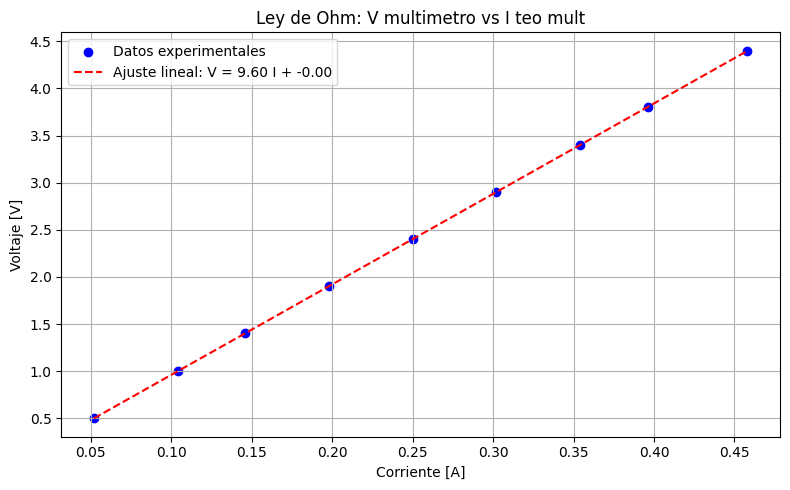

Pendiente (resistencia estimada): 9.60 ohm
R² del ajuste: 1.0000


In [3]:

graficar_ley_ohm(df_1,v_col='V multimetro', i_col='I teo mult')

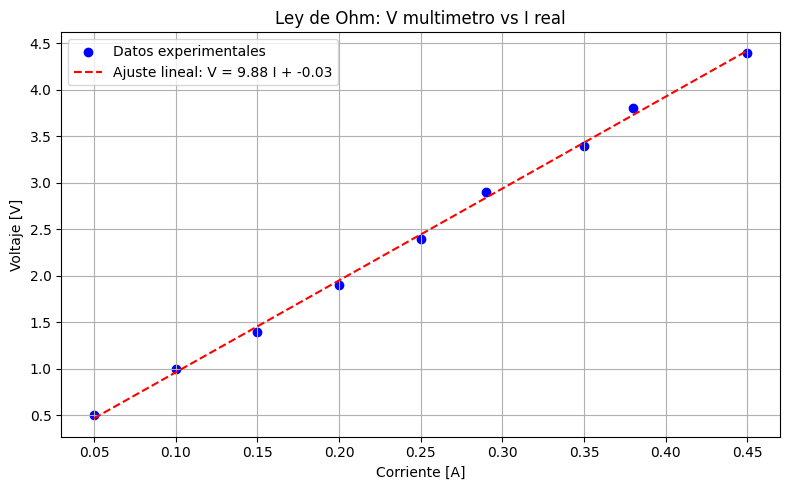

Pendiente (resistencia estimada): 9.88 ohm
R² del ajuste: 0.9986


In [4]:
graficar_ley_ohm(df_1,v_col='V multimetro', i_col='I real')

V Mult vs V fuente

Pendiente (ajuste lineal): 1.000
Ordenada al origen: 0.134


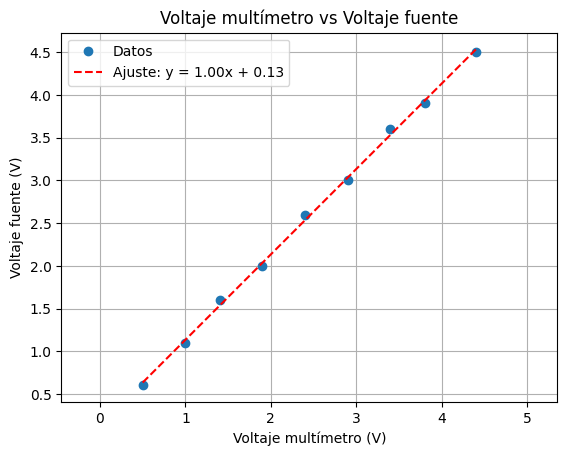

In [5]:
vmult_vs_vfuente(df_1)